In [3]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('test.csv')

# Data Preprocessing
# Filling missing values using the dictionary format to avoid FutureWarning
data.fillna({'Age': data['Age'].median(), 'Fare': data['Fare'].median(), 'Embarked': data['Embarked'].mode()[0]}, inplace=True)

# Encoding categorical variables
label_encoder_sex = LabelEncoder()
label_encoder_embarked = LabelEncoder()
data['Sex'] = label_encoder_sex.fit_transform(data['Sex'])
data['Embarked'] = label_encoder_embarked.fit_transform(data['Embarked'])

# Feature Engineering
# Selecting relevant features (Pclass, Sex, Age, SibSp, Parch, Fare)
# Target is the 'Embarked' column
X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y = data['Embarked']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training the Naive Bayes Classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Making predictions
y_pred = nb_classifier.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Outputting results
print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy: 0.3968253968253968

Confusion Matrix:
 [[ 8  8 11]
 [ 0 13  1]
 [12 44 29]]

Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.30      0.34        27
           1       0.20      0.93      0.33        14
           2       0.71      0.34      0.46        85

    accuracy                           0.40       126
   macro avg       0.44      0.52      0.38       126
weighted avg       0.59      0.40      0.42       126



In [4]:
# Display a concise summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 36.0+ KB


In [10]:
import joblib
joblib.dump(nb_classifier, 'naive_bayes_classifier_model.pkl')

['naive_bayes_classifier_model.pkl']

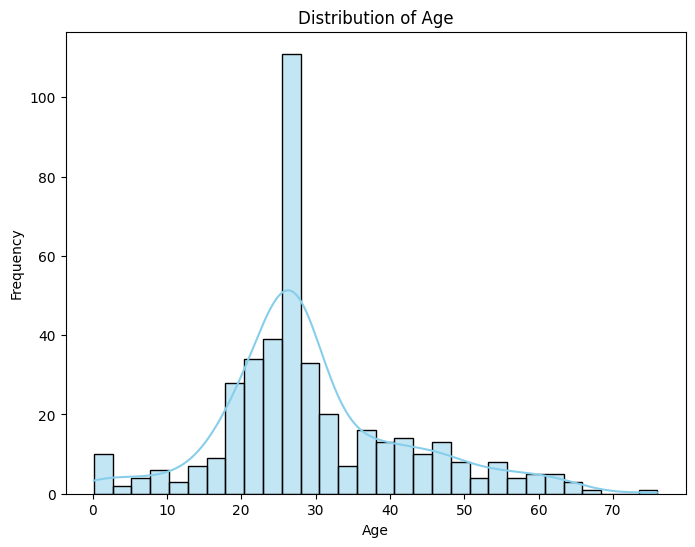

In [6]:
# Visualizing the distribution of Age
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

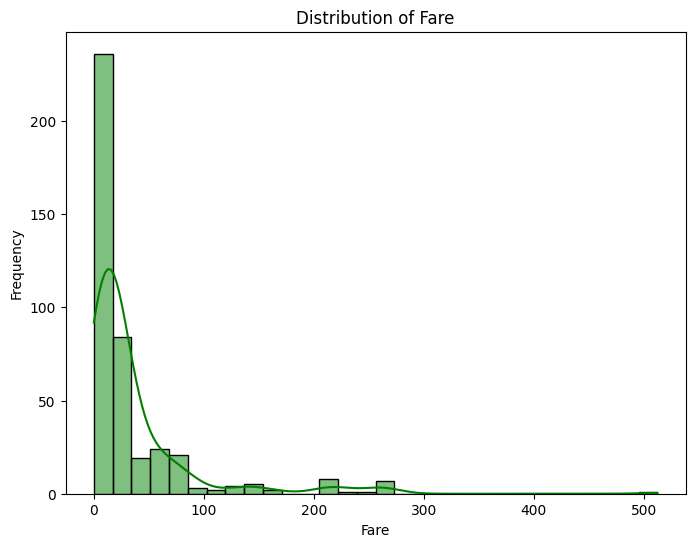

In [7]:
# Visualizing the distribution of Fare
plt.figure(figsize=(8, 6))
sns.histplot(data['Fare'], bins=30, kde=True, color='green')
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

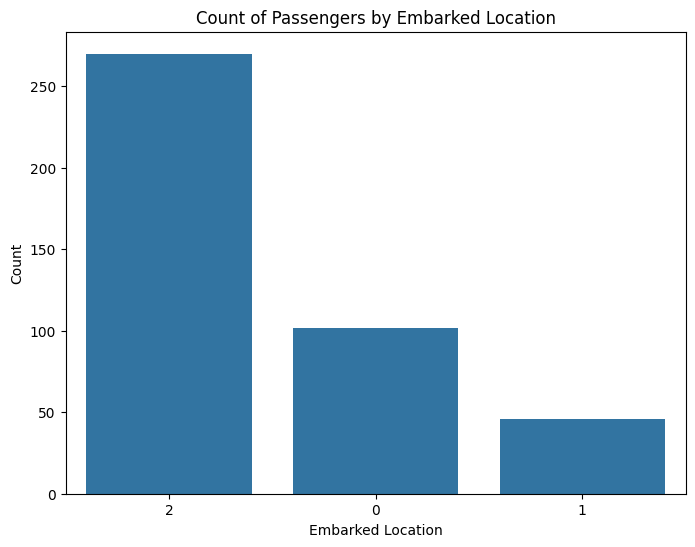

In [8]:
# Visualizing the count of Embarked locations
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Embarked', order=data['Embarked'].value_counts().index)
plt.title('Count of Passengers by Embarked Location')
plt.xlabel('Embarked Location')
plt.ylabel('Count')
plt.show()

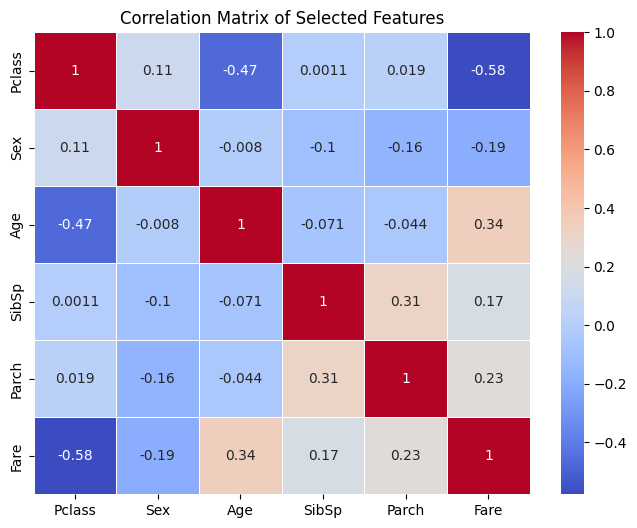

In [9]:
# Visualizing the correlation matrix
plt.figure(figsize=(8, 6))
correlation_matrix = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Selected Features')
plt.show()